In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits=load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

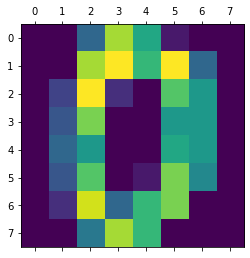

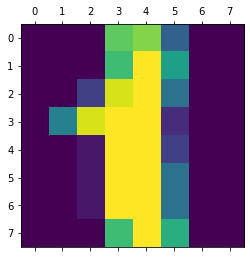

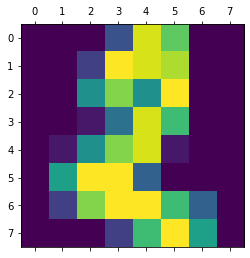

In [3]:
for i in range(3):
    plt.matshow(digits.images[i])

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
#digits.DESCR
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits.target.shape

(1797,)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [10]:
model.fit(x_train,y_train)

C:\Users\VARSHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model.score(x_test,y_test)

0.9666666666666667

In [12]:
model.predict(digits.data[0:3])

array([0, 1, 2])

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_pred=model.predict(x_test)
y_pred[0:10]

array([6, 4, 6, 6, 2, 9, 1, 1, 5, 1])

In [15]:
y_test[0:10]

array([6, 4, 6, 6, 2, 9, 1, 1, 5, 1])

In [16]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 36,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 49]], dtype=int64)

Text(69.0, 0.5, 'truth')

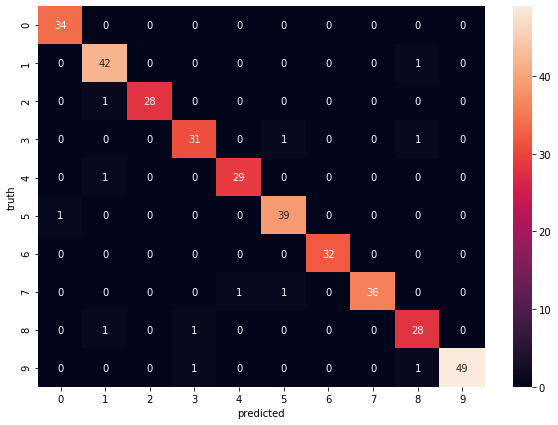

In [17]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [18]:
from sklearn.svm import SVC
mod_svc=SVC()

In [19]:
mod_svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
mod_svc.score(x_test,y_test)

0.9861111111111112

In [21]:
mod_svc_lin=SVC(kernel='linear')
mod_svc_lin.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
mod_svc_lin.score(x_test,y_test)

0.975

In [23]:
mod_svc_c=SVC(C=10)
mod_svc_c.fit(x_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
mod_svc_c.score(x_test,y_test)

0.9833333333333333

In [25]:
mod_svc_gamma=SVC(gamma='auto')
mod_svc_gamma.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
mod_svc_gamma.score(x_test,y_test)

0.46944444444444444

In [27]:
from sklearn.ensemble import RandomForestClassifier
mod_rand=RandomForestClassifier(n_estimators=10)
mod_rand.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
model.score(x_test, y_test)

0.9666666666666667

In [29]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [30]:
for train,test in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train,test)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [31]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [32]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [33]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [34]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [35]:
scores_rf

[0.9265442404006677, 0.9449081803005008, 0.9382303839732888]

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

In [38]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

In [39]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.9148581 , 0.94991653, 0.91986644])